### Data Analysis on Fuel Economy
We will analyze fuel economy data for different car models from 2008 and 2018. This file contains the entire data analysis process to analyze this dataset.

In this case study, we'll be analyzing [fuel economy data provided by the EPA](https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy), or Environmental Protection Agency.

What is Fuel Economy?
Excerpt from Wikipedia [page](https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles) on Fuel Economy in Automobiles:

The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.

Fuel economy data is collected from vehicle testing at EPA's National Vehicle and Fuel Emissions Lab in Ann Arbor, Michigan. The EPA provides this data to the government each year, which the Department of Energy uses to publish their fuel economy guide. This data is available for download from [DOE Fuel Economy Data](https://www.fueleconomy.gov/feg/download.shtml/). We'll be analyzing data sets that are downloaded here for 2018 and 2008. If you do a preliminary review of the csv files, there are probably a few features in the datasets that don't make too much sense to you. Before analyzing these datasets, you should take some time to understand this data and how it was collected. Luckily, there's good documentation for this. On the bottom of page for downloading the data (URL provided above), there are two links to documentation for this data. Here is the link to the [PDF documentation](https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf).

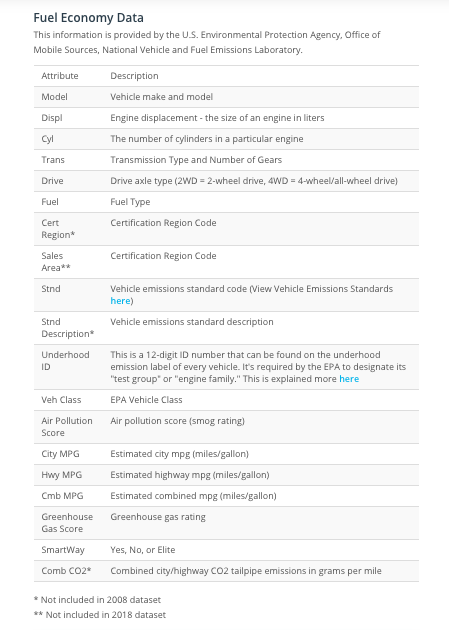

### Asking Questions
Some of the relevant questions on the basis of a prelimanary study of dataset (from URL provided in the above cell) are:
- Are more models using alternative sources of fuel? By how much?
- How much have vehicle classes improved in fuel economy?
- What are the characteristics of SmartWay vehicles?
- What features are associated with better fuel economy?
- For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicles improved the most?

### Gathering data

Downloaded the following csv files and put them in the same directory as this notebook:
- all_alpha_08.csv
- all_alpha_18.csv

### Accessing Data
Use the read_csv function from pandas to access the data through downloaded csv files.

In [382]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df_08 = pd.read_csv('all_alpha_08.csv')
df_08.sample()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
1945,PORSCHE Cayman,2.7,(6 cyl),Auto-L5,2WD,Gasoline,FA,B5,8PRXV03.4C87,small car,6,Drv,19,26,21,28.0602,6,no


In [383]:
df_18 = pd.read_csv('all_alpha_18.csv')
df_18.sample()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
921,JEEP Compass,2.4,4.0,Man-6,2WD,Gasoline,FA,T3B110,Federal Tier 3 Transitional Bin 110,JCRXT02.45P0,small SUV,3,23,32,26,5,No,339


In [384]:
df_08.shape

(2404, 18)

In [385]:
df_18.shape

(1611, 18)

In [386]:
sum(df_08.duplicated())

25

In [387]:
sum(df_18.duplicated())

0

In [388]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [389]:
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [390]:
df_08.isnull().any(axis=1).sum()

199

In [391]:
df_18.isnull().any(axis=1).sum()

2

In [392]:
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [393]:
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [394]:
df_08.Fuel.unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [395]:
df_18.Fuel.unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
       'Electricity'], dtype=object)

### Cleaning Column Labels

##### Drop extraneous columns
Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions. Use pandas' drop function.

Columns to Drop:
- From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'
- From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

##### Rename Columns
- Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.
- Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [396]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [397]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

# confirm changes
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


In [398]:
# rename Sales Area to Cert Region
df_08.rename(columns={'Sales Area':'Cert Region'}, inplace=True)

# confirm changes
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [399]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [400]:
# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


In [401]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [402]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [403]:
# save new datasets for next section
df_08.to_csv('data_08.csv', index=False)
df_18.to_csv('data_18.csv', index=False)

### Filter, Drop Nulls, Dedupe

1. Filter
    - For consistency, only compare cars certified by California standards. Filter both datasets using query to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

2. Drop Nulls
    - Drop any rows in both datasets that contain missing values.

3. Dedupe
    - Drop any duplicate rows in both datasets.

In [404]:
# load datasets

df_08 = pd.read_csv('data_08.csv')
df_18 = pd.read_csv('data_18.csv')

In [405]:
# view dimensions of dataset
df_08.shape

(2404, 14)

In [406]:
# view dimensions of dataset
df_18.shape

(1611, 14)

In [407]:
# filter datasets for rows following California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [408]:
# confirm only certification region is California
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [409]:
# confirm only certification region is California
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [410]:
# drop certification region columns form both datasets
df_08.drop(['cert_region'], axis=1, inplace=True)
df_18.drop(['cert_region'], axis=1, inplace=True)

In [411]:
df_08.shape

(1084, 13)

In [412]:
df_18.shape

(798, 13)

In [413]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [414]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [415]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [416]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [417]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

In [418]:
# print number of duplicates in 2008 and 2018 datasets
sum(df_08.duplicated())

23

In [419]:
sum(df_18.duplicated())

3

In [420]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [421]:
# print number of duplicates again to confirm dedupe - should both be 0
sum(df_08.duplicated())

0

In [422]:
sum(df_18.duplicated())

0

In [423]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [424]:
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [425]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


In [426]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

### Inspecting Data Types
- Changes to make 'cyl' column in both datasets clear and consistent:
    - Extract int values from the strings in 2008 'cyl' column.
    - Convert float to int values in 2018 'cyl' column.
- Changes to make 'air_pollution_score' column in both the datasets consistent:
    - Convert string to float values in 2008 'air_pollution_score' column.
    - Convert int to float values in 2018 'air_pollution_score' column.
- Changes to make 'city_mpg', 'hwy_mpg' and 'cmb_mpg' columns in both datasets appropriate and consistent:
    - Convert string to float values for columns 'city_mpg', 'hwy_mpg' and 'cmb_mpg' columns in both datasets.
- Changes to make 'greenhouse_gas_score' column in both datasets clear and consistent:
    - Convert string to int values in 2008 'greenhouse_gas_score' column.

In [427]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [428]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str[1:3].astype(int)

In [429]:
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [430]:
# check value counts for the 2018 cyl column
df_18['cyl'].value_counts()

4.0     365
6.0     246
8.0     153
3.0      18
12.0      9
5.0       2
16.0      1
Name: cyl, dtype: int64

In [431]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18.cyl.astype(int)

In [432]:
# Check value counts for 2018 cyl column again to confirm the change
df_18['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

Trying to use Pandas to_numeric or astype function to convert the 2008 air_pollution_score column to float won't work.

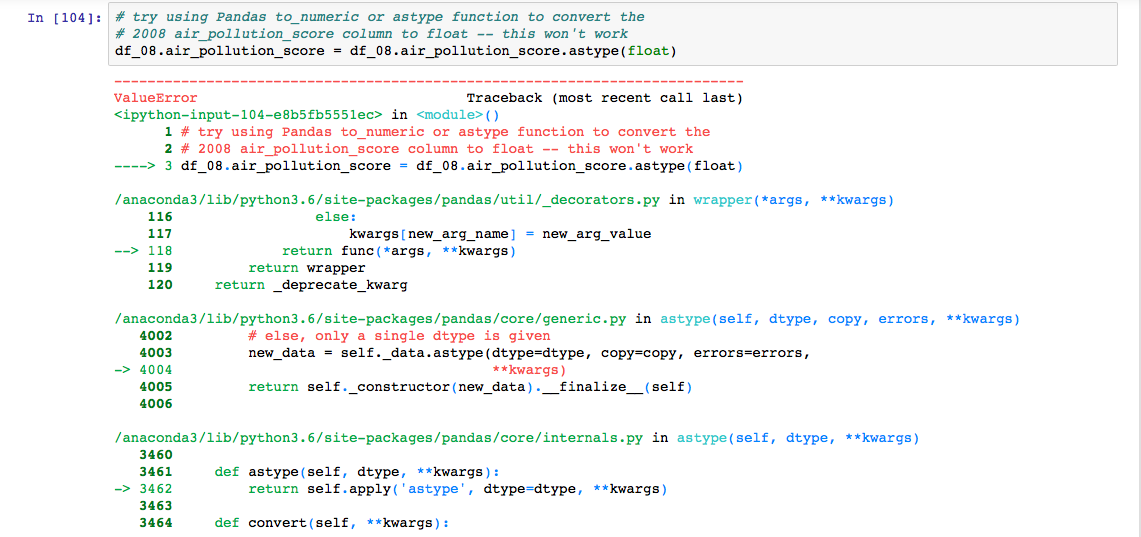
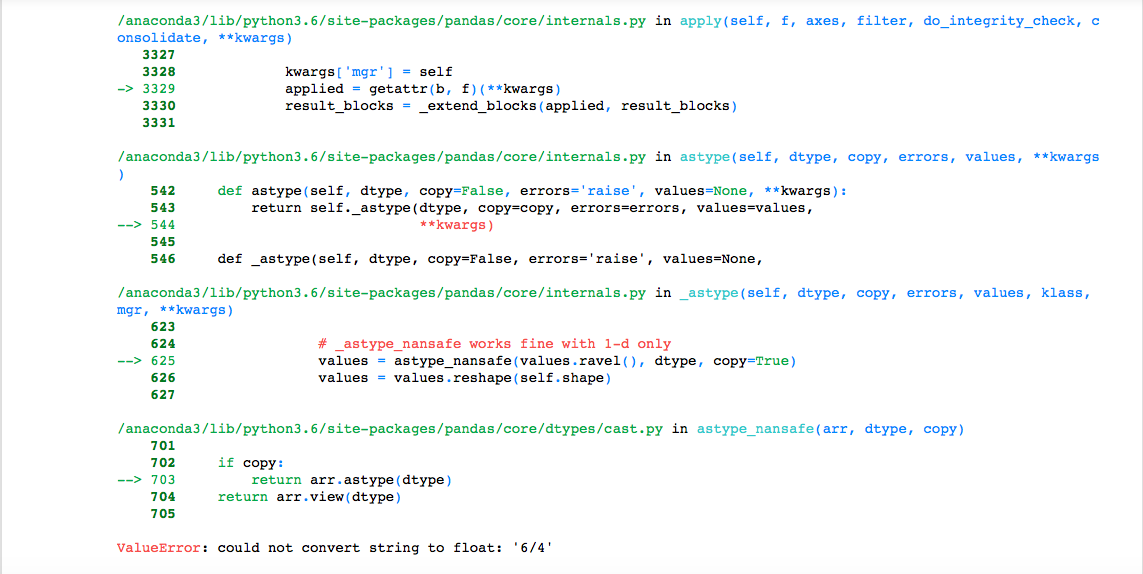

#### Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the value at row 582 is "6/4" - let's check it out.

In [433]:
df_08.iloc[582]

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 1550, dtype: object

#### It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](https://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:
"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
Ohh.. so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

In [434]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


Looks like this dataset (2008) only has one! But 2018 has MANY more.

In [435]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [436]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


For this next part, we're going use Pandas' apply function. See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).

In [437]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [438]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [439]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [440]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [441]:
# drop the original hybrid rows
df_08.drop(hb_08.index, inplace=True)

# add in our newly separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [442]:
# check that all the original hybrid rows with "/"s are gone
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [443]:
df_08.shape

(987, 13)

#### Repeat this process for the 2018 dataset

In [444]:
# create two copies of the 2018 hybrids dataframe, hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

#### Split values for fuel, city_mpg, hwy_mpg, cmb_mpg
You don't need to split for air_pollution_score or greenhouse_gas_score here because these columns are already ints in the 2018 dataset.

In [445]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [446]:
# append the two dataframes
new_rows = df1.append(df2)

# drop each hybrid row from the original 2018 dataframe
# do this by using Pandas drop function with hb_18's index
df_18.drop(hb_18.index, inplace=True)

# append new_rows to df_18
df_18 = df_18.append(new_rows, ignore_index=True)

In [447]:
# check that they're gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [448]:
df_18.shape

(832, 13)

Now we can comfortably continue the changes needed for air_pollution_score! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [449]:
# convert string to float for 2008 air pollution column
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [450]:
# convert int to float for 2018 air pollution column
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [451]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [452]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

## All the dataypes are now fixed! Take one last check to confirm all the changes.

In [453]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [454]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [455]:
# Save your new CLEAN datasets as new files!
df_08.to_csv('clean_08.csv', index=False)
df_18.to_csv('clean_18.csv', index=False)

### Exploring with Visuals

(array([ 25.,  16.,  64.,  82., 114., 166., 279., 163.,  66.,  12.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

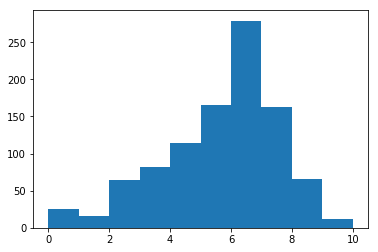

In [456]:
plt.hist(df_08['greenhouse_gas_score'], bins=10)

(array([ 12.,  36., 166., 164., 230., 110.,  63.,  20.,   7.,  24.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

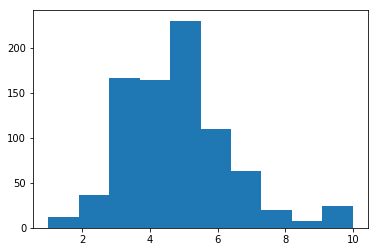

In [457]:
plt.hist(df_18['greenhouse_gas_score'], bins=10)

#### Distributions of greenhouse gas score for 2008 is more skewed to the left.

(array([  3.,   7.,  15.,   0.,  16.,  64.,  83.,   0.,  53.,  61.,   0.,
         77.,  89.,  94.,   0.,  84., 101.,   0.,  59.,  67.,  36.,   0.,
         24.,  17.,   0.,  13.,  12.,   1.,   0.,   3.,   4.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([10.  , 10.72, 11.44, 12.16, 12.88, 13.6 , 14.32, 15.04, 15.76,
        16.48, 17.2 , 17.92, 18.64, 19.36, 20.08, 20.8 , 21.52, 22.24,
        22.96, 23.68, 24.4 , 25.12, 25.84, 26.56, 27.28, 28.  , 28.72,
        29.44, 30.16, 30.88, 31.6 , 32.32, 33.04, 33.76, 34.48, 35.2 ,
        35.92, 36.64, 37.36, 38.08, 38.8 , 39.52, 40.24, 40.96, 41.68,
        42.4 , 43.12, 43.84, 44.56, 45.28, 46.  ]),
 <a list of 50 Patch objects>)

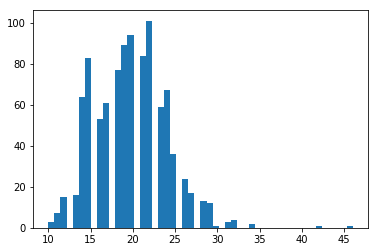

In [458]:
plt.hist(df_08['cmb_mpg'], bins=50)

(array([  3.,  12.,  29.,  59., 120., 105., 123., 118.,  91.,  62.,  33.,
         36.,   8.,   8.,   3.,   2.,   4.,   0.,   3.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   1.,   1.,   2.,   1.,   0.,   2.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.]),
 array([ 10.  ,  11.92,  13.84,  15.76,  17.68,  19.6 ,  21.52,  23.44,
         25.36,  27.28,  29.2 ,  31.12,  33.04,  34.96,  36.88,  38.8 ,
         40.72,  42.64,  44.56,  46.48,  48.4 ,  50.32,  52.24,  54.16,
         56.08,  58.  ,  59.92,  61.84,  63.76,  65.68,  67.6 ,  69.52,
         71.44,  73.36,  75.28,  77.2 ,  79.12,  81.04,  82.96,  84.88,
         86.8 ,  88.72,  90.64,  92.56,  94.48,  96.4 ,  98.32, 100.24,
        102.16, 104.08, 106.  ]),
 <a list of 50 Patch objects>)

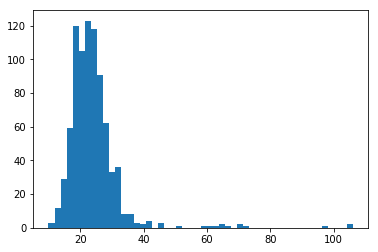

In [459]:
plt.hist(df_18['cmb_mpg'], bins=50)

#### We find that the distribution of combined mpg changed from 2008 to 2018 in being more skewed to the right.

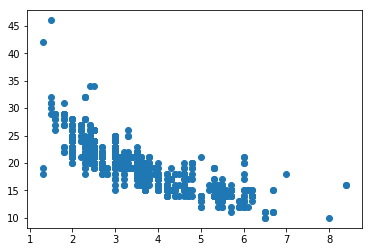

In [460]:
plt.scatter(df_08['displ'], df_08['cmb_mpg'])

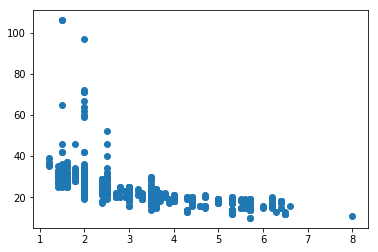

In [461]:
plt.scatter(df_18['displ'], df_18['cmb_mpg'])

#### There is a negative correlation between displacement and combined mpg.

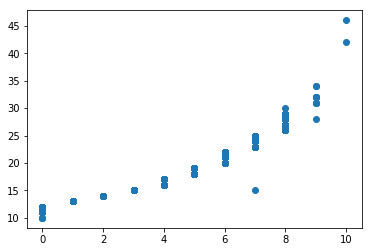

In [462]:
plt.scatter(df_08['greenhouse_gas_score'], df_08['cmb_mpg'])

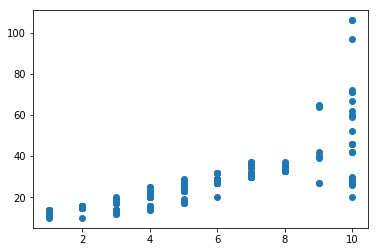

In [463]:
plt.scatter(df_18['greenhouse_gas_score'], df_18['cmb_mpg'])

#### There is a positive correlation between greenhouse gas score and combined mpg.

### Conclusions and Visuals
Let's answer the following questions:
- Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?
- Q2: How much have vehicle classes improved in fuel economy (increased in mpg)?
- Q3: What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)
- Q4: What features are associated with better fuel economy (mpg)?

#### Q1: Are more unique models using alternative sources of fuel? By how much?

In [464]:
df_08.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [465]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [466]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

2

In [467]:
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()
alt_18

26

Text(0,0.5,'Number of Unique Models')

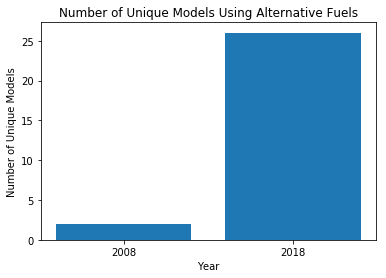

In [468]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")

In [469]:
# total unqiue models each year
total_08 = df_08.model.nunique()

In [470]:
total_18 = df_18.model.nunique()

In [471]:
prop_08 = alt_08 / total_08

In [472]:
prop_18 = alt_18 / total_18

Text(0,0.5,'Proportion of unique models')

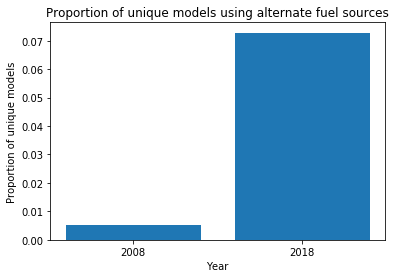

In [473]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of unique models using alternate fuel sources")
plt.xlabel("Year")
plt.ylabel("Proportion of unique models")

Since 2008, the number of unique models using alternative sources of fuel increased by 24.

#### Q2: How much have vehicle classes improved in fuel economy?

In [474]:
# average fuel economy for each vehicle class for both years.
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [475]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [476]:
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

Text(0,0.5,'Increase in average combined mpg')

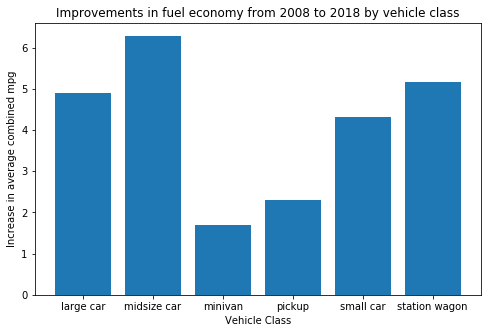

In [477]:
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in fuel economy from 2008 to 2018 by vehicle class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in average combined mpg')

#### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [478]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [479]:
smart_08 = df_08.query('smartway == "yes"')
smart_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes
15,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,25.0,7,yes
17,AUDI A4,2.0,4,Auto-AV,2WD,Gasoline,small car,7.0,21.0,30.0,24.0,7,yes
46,AUDI TT Coupe,2.0,4,Auto-S6,2WD,Gasoline,small car,7.0,23.0,31.0,26.0,8,yes
49,AUDI TT Roadster,2.0,4,Auto-S6,2WD,Gasoline,small car,7.0,22.0,29.0,25.0,7,yes
58,BMW 328ci,3.0,6,Man-6,2WD,Gasoline,small car,9.5,20.0,30.0,24.0,7,yes


In [480]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [481]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [482]:
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')
smart_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,27.0,40.0,32.0,7,Yes
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,29.0,40.0,33.0,8,Yes
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,31.0,47.0,37.0,7,Yes
171,CHEVROLET Cruze,1.6,4,Man-6,2WD,Diesel,small car,3.0,30.0,52.0,37.0,7,Yes
172,CHEVROLET Cruze Hatchback,1.4,4,Man-6,2WD,Gasoline,midsize car,6.0,27.0,38.0,31.0,7,Yes
173,CHEVROLET Cruze Hatchback,1.4,4,SemiAuto-6,2WD,Gasoline,midsize car,6.0,29.0,38.0,32.0,7,Yes
174,CHEVROLET Cruze Hatchback,1.6,4,Auto-9,2WD,Diesel,midsize car,3.0,30.0,45.0,35.0,7,Yes
175,CHEVROLET Cruze Hatchback,1.6,4,Man-6,2WD,Diesel,midsize car,3.0,29.0,48.0,35.0,7,Yes


In [483]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


#### Q4: What features are associated with better fuel economy?

In [484]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')

In [485]:
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [486]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')

In [487]:
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Last Question!
Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?<br/>
This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first learn about merges.

#### Types of Merges

So far, we've learned about appending dataframes. Now we'll learn about [Pandas Merges](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging), a different way of combining dataframes. This is similar to the database-style "join." If you're familiar with SQL, this [comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join) may help you connect these two.<br/>

Here are the four types of merges in Pandas. Below, "key" refers to common columns in both dataframes that we're joining on.

- Inner Join - Use intersection of keys from both frames.
- Outer Join - Use union of keys from both frames.
- Left Join - Use keys from left frame only.
- Right Join - Use keys from right frame only.

Below are diagrams to visualize each type.

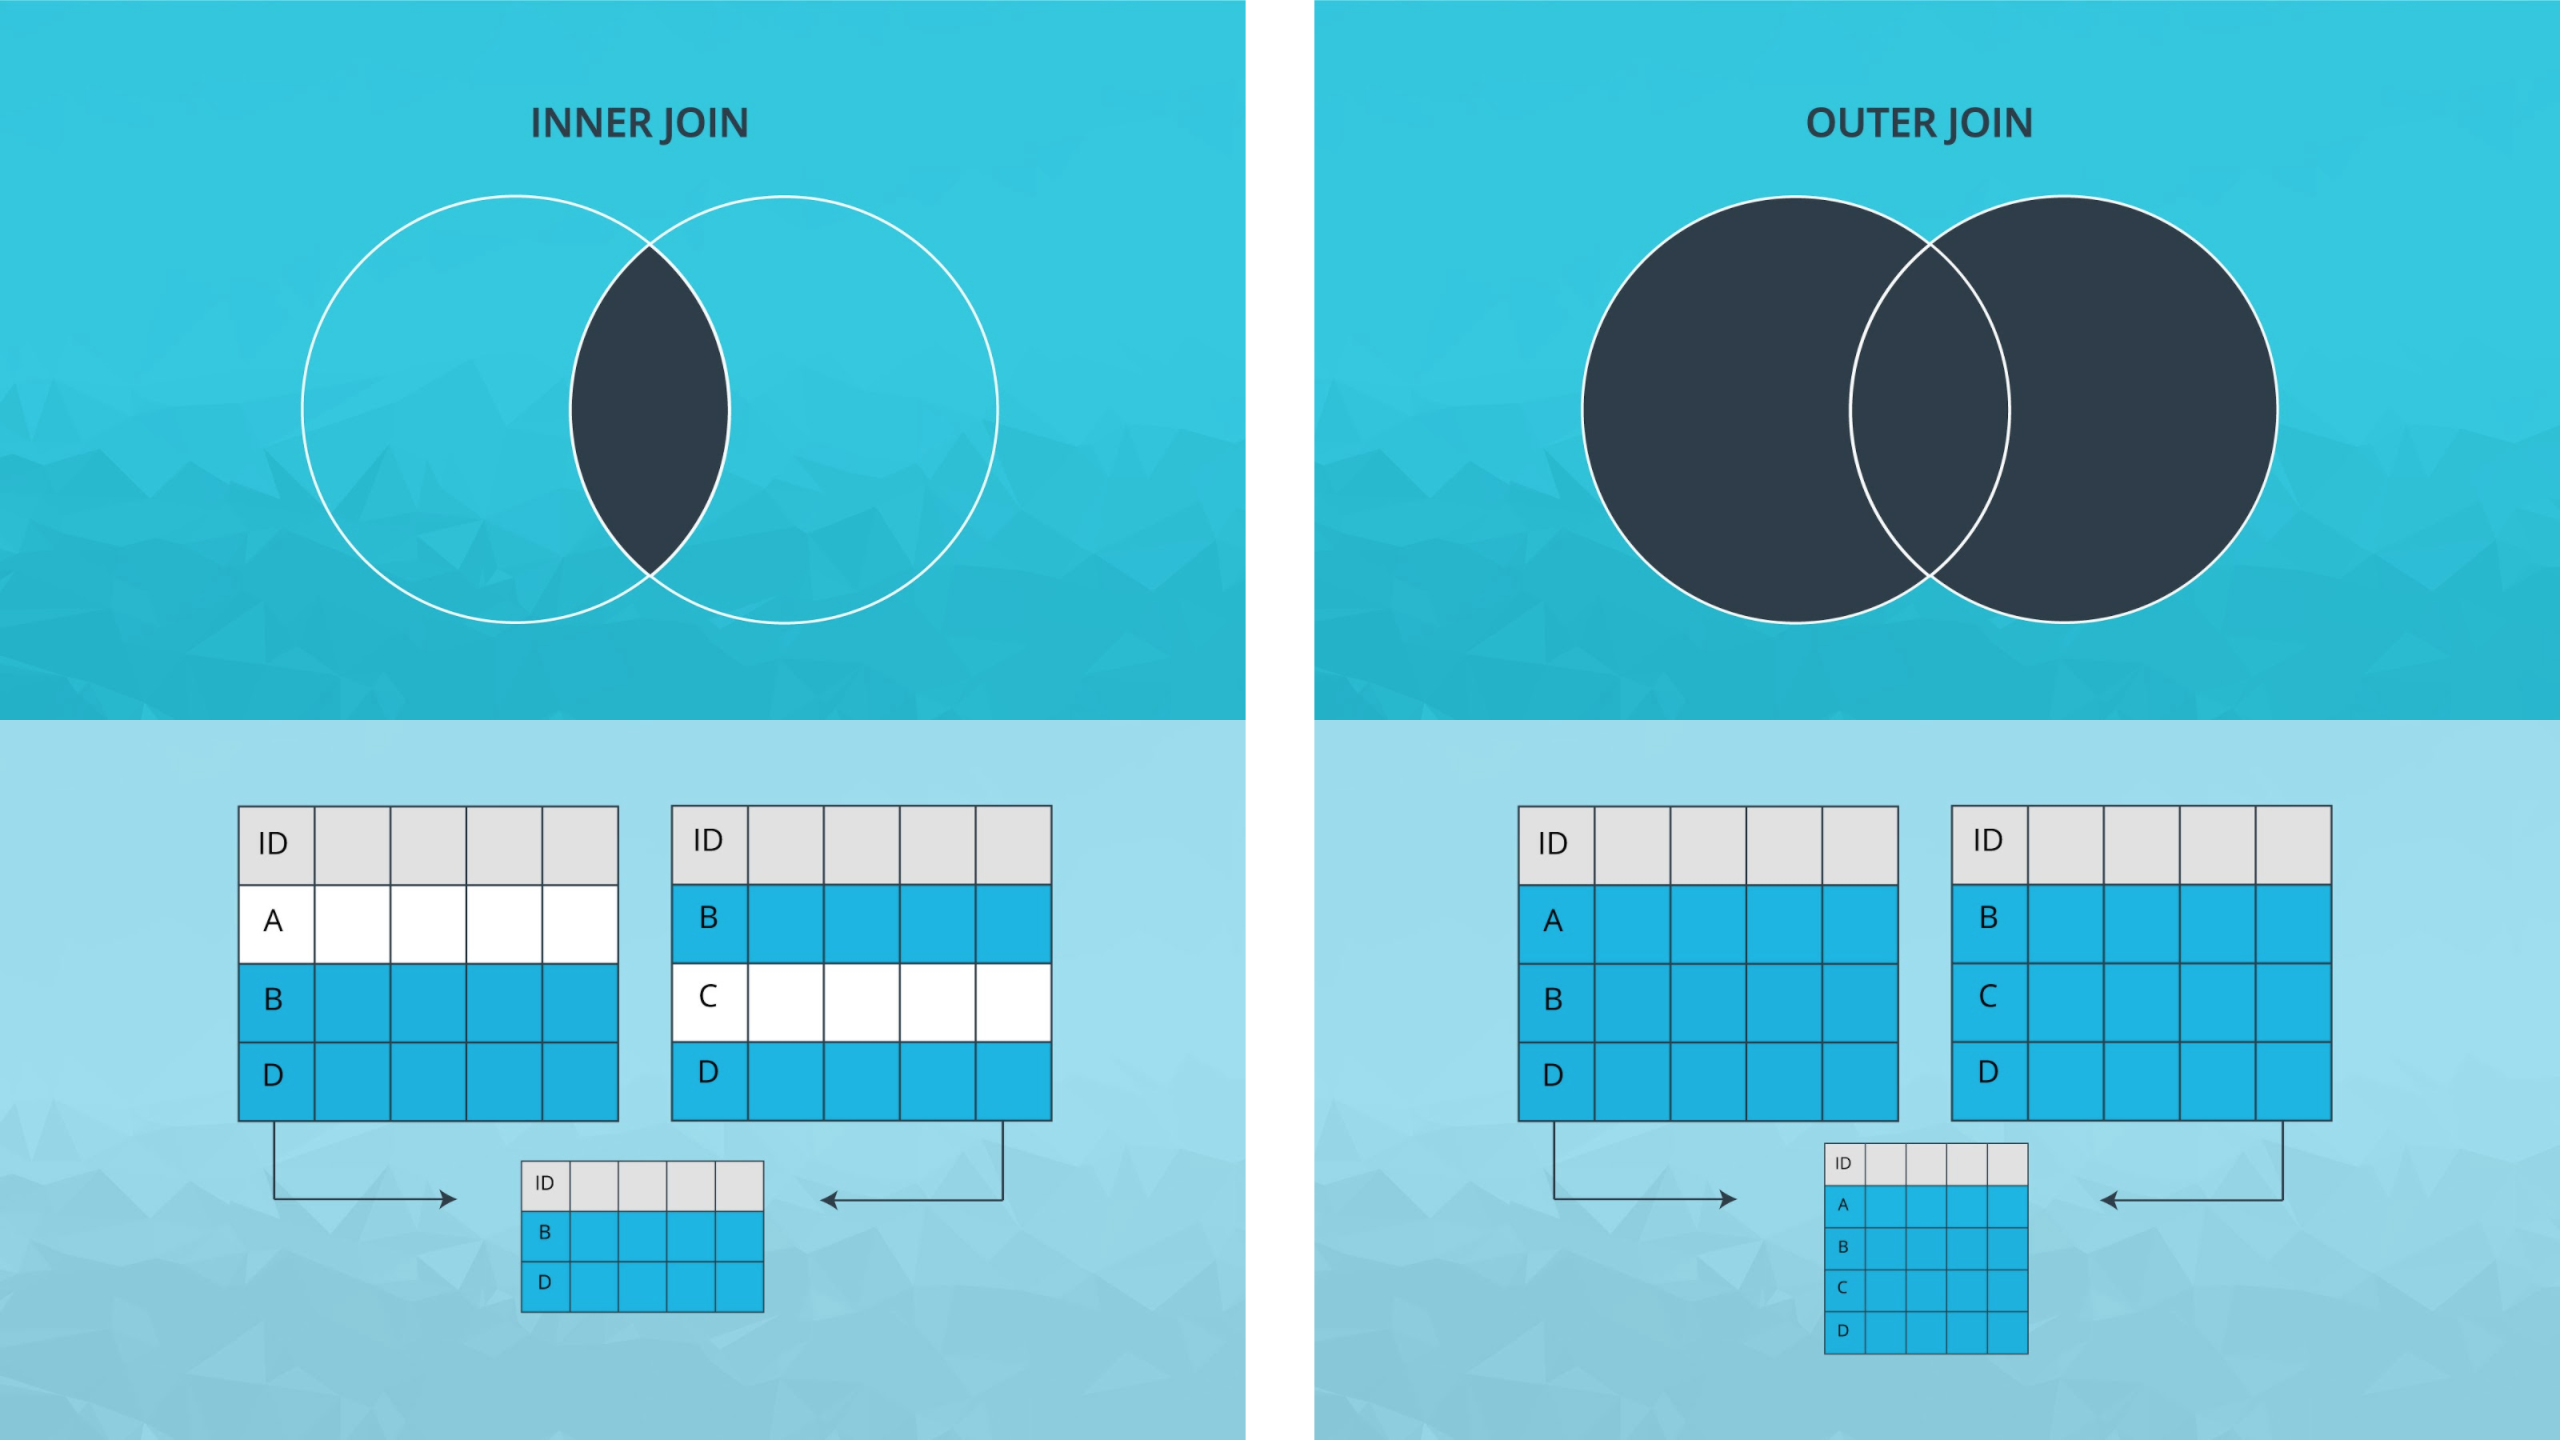
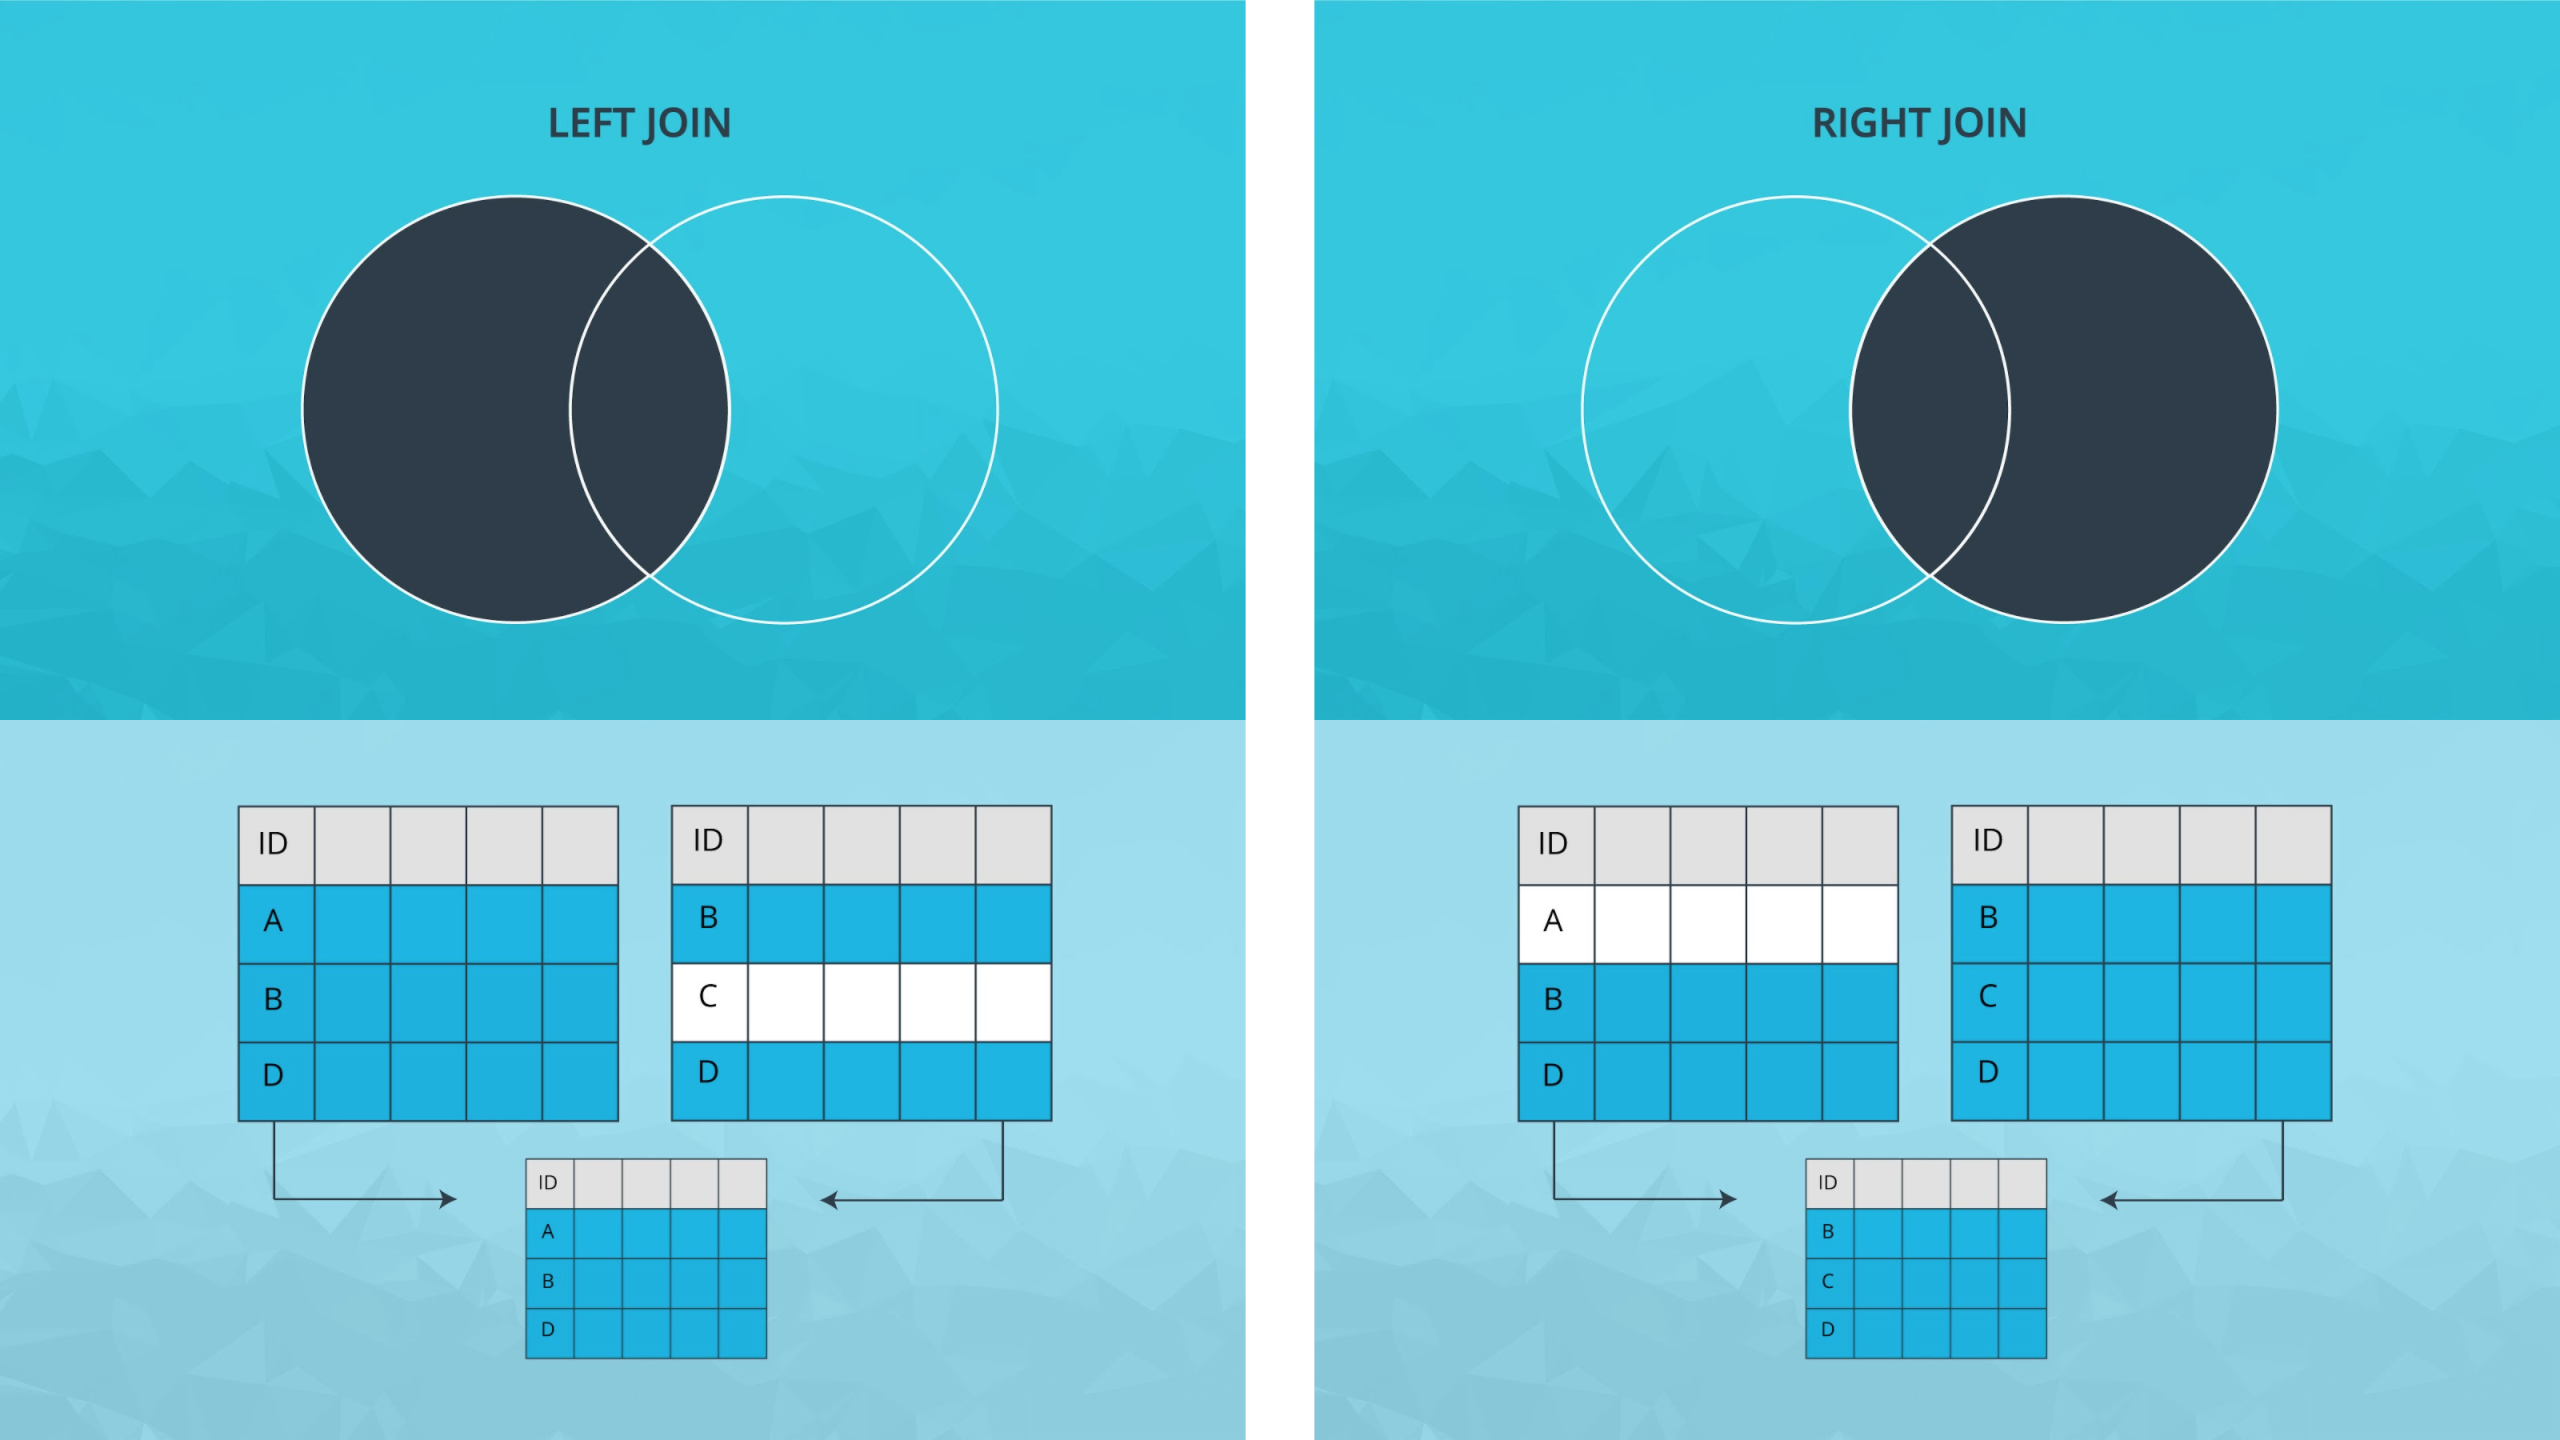

#### Merging Datasets

- Rename 2008 columns to distinguish from 2018 columns after the merge<br/>
    - To do this, use pandas' rename() with a lambda function. See example [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html). In the lambda function, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)<br/>
    - The lambda function should look something like this: lambda x: x[:10] + "_2008"<br/>
    - In your rename, don't forget to specify the parameter columns= when you add the lambda function!

- Perform inner merge<br/>
    - To answer the last question, we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.<br/>
    - Perform an inner merge with the left on model_2008 and the right on model. See documentation for pandas' merge [here](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

In [488]:
# rename 2008 columns
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [489]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [490]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [491]:
# view to check merge
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


In [492]:
df_combined.to_csv('combined_dataset.csv', index=False)

#### Results with Merged Dataset
Use the notebook below to answer the final question with the merged dataset.<br/>

Q5: For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?<br/>

Here are the steps for answering this question.

1. Create a new dataframe, model_mpg, that contain the mean combined mpg values in 2008 and 2018 for each unique model
    - To do this, group by model and find the mean cmb_mpg_2008 and mean cmb_mpg for each.

2. Create a new column, mpg_change, with the change in mpg
    - Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

3. Find the vehicle that improved the most
    - Find the max mpg change, and then use query or indexing to see what model it is!

In [493]:
# load dataset
df = pd.read_csv('combined_dataset.csv')

In [494]:
df.sample()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
154,CHEVROLET Silverado 15,4.3,6,Auto-L4,4WD,Gasoline,pickup,6.0,14.0,18.0,...,Auto-6,4WD,Gas,pickup,5.0,17.0,22.0,19.0,3,No


In [495]:
model_mpg = df.groupby('model').cmb_mpg_2008.mean()

In [496]:
model_mpg

model
ACURA RDX                      19.000000
AUDI A3                        23.333333
AUDI A4                        21.000000
AUDI A6                        19.666667
AUDI A8 L                      16.500000
AUDI Q7                        15.000000
AUDI S4                        15.500000
AUDI S5                        16.000000
AUDI TT Coupe                  21.666667
AUDI TT Roadster               21.333333
BMW 750i                       20.000000
BMW Alpina B7                  18.000000
BMW M6 Convertible             14.000000
CADILLAC CTS                   20.000000
CADILLAC Escalade              14.000000
CHEVROLET Corvette             18.000000
CHEVROLET Equinox              19.000000
CHEVROLET Impala               20.500000
CHEVROLET Malibu               22.333333
CHEVROLET Silverado 15         16.000000
CHEVROLET Tahoe 1500           14.000000
CHRYSLER 300                   18.800000
CHRYSLER Pacifica              17.333333
DODGE Challenger               15.000000
DODGE Char

In [497]:
model_mpg.max()

31.5

For all of the models that were produced in 2008 that are still being produced now, the model "TOYOTA Yaris" has improved the most.